**IRIS Flower Classifier using Random Forest** <br></br><br></br>
In this kernel, I will be working with the "Hello World" data of Data Science and Machine Learing, the IRIS dataset. I will attempt to make a classifier model using Random Forest. Let's get started..

In [1]:
#Import the needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

**Loading the Data** <br></br>
Iris data is readily available is scikit learn. To load the iris flower dataset, import the load_iris library form sklearn.datasets

In [2]:
from sklearn.datasets import load_iris

In [3]:
#Create an instance of the load_iris. Here, I'm naming it flower_data but you can name it whatever you want.
flower_data = load_iris()

#Calling the flower_data will give you a dictionary containing the information of the iris data (e.g data, target, target_names, DESCR,
# feature_names and filename)
flower_data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

Each key in the dictionary can be called using the **.** notation. To get the data, you can just type flower_data.data. <br></br>
This will give you the entire feature data which are the measurements of the sepal length, sepal width, petal length and petal width

In [4]:
flower_data.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [5]:
flower_data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

The flower_data.target contains target data which is just a numerical representation of the IRIS flower species (i.e **setosa**, **versicolor**, **virginaca**)

In [6]:
flower_data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
flower_data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
flower_data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

**Convert to Pandas DataFrame**

In [9]:
#Converting the data to a pandas dataframe
df = pd.DataFrame(flower_data.data, columns=flower_data.feature_names)

#adding another column for the target and we will call it 'species'
df['species'] = flower_data.target

#Since target is a numerical representation. We will map the corresponding target_names
df['species'] = df['species'].apply(lambda x: flower_data.target_names[x])

#displaying the first top 5 data
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Looking at the result by calling the dataframe info method, it shows that there are a total of 150 entries. No missing data on the <br></br> data columns

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
species              150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [11]:
# Descibe method will show the mead, standard deviation, min, max and percentile
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


It can be observe that the iris dataset is a balanced dataset. A total of 50 samples for each flower species.

In [12]:
df['species'].value_counts()

setosa        50
virginica     50
versicolor    50
Name: species, dtype: int64

**Exploratory Data Analysis** <br></br><br></br>
**Exploratory Data Analysis** (EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.

source: https://en.wikipedia.org/wiki/Exploratory_data_analysis

Let's take a look at how data is distributed based on sepal length and sepal width.

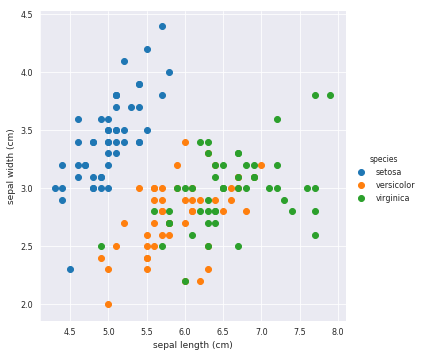

In [13]:
sns.set_context(font_scale=2, rc={'font.size':8, 'axes.labelsize':9})
sns.set_style('darkgrid')
sns.FacetGrid(df, hue='species', height=5)\
.map(plt.scatter, 'sepal length (cm)', 'sepal width (cm)')\
.add_legend()

plt.show()

**Observations** <br></br>
1. Using the features sepal length ang sepal width, we can easily classify the setosa flower variety from the 2 other species <br></br>
2. It is much harder to classify versicolor and virginica as there is a clearly overlap between data

A similar scatter plot is shown below based on petal length and petal width 

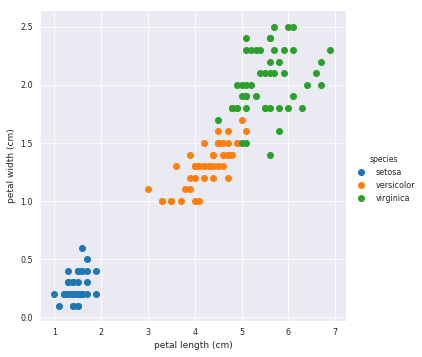

In [14]:
sns.set_style('darkgrid')
sns.FacetGrid(df, hue='species', height = 5)\
.map(plt.scatter, 'petal length (cm)', 'petal width (cm)')\
.add_legend()

plt.show()

**Onservations**
1. Again, the setosa can easily be determine using the petal lenght and petal width features <br></br>
2. There is still data overlap between versicolor and virgina but it is not that much using the petal length and petal width features

**Pairplot**
Since our iris data contains 4 features or dimensions, it is difficult to visualize in a data in multiple dimension. A solution to this is using a pairplot. A pairplot is simply a 2D plots used to understand the relationship or pattern between two variables or dimensions in our dataset

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


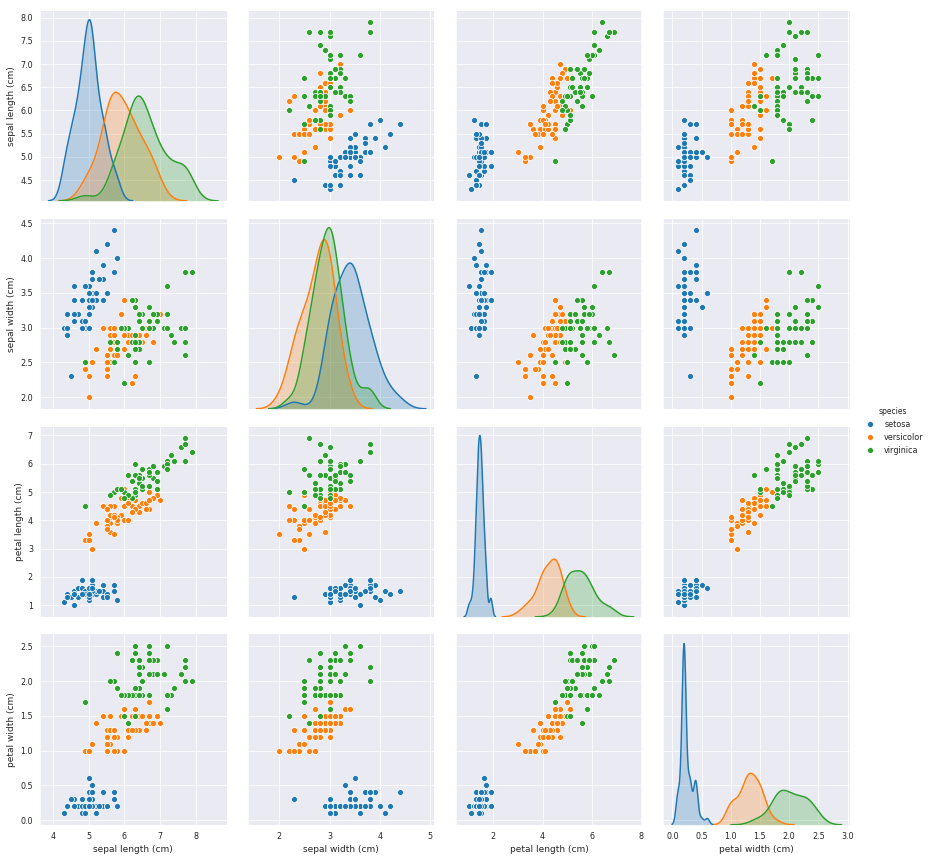

In [15]:
sns.pairplot(df, hue='species', height=3)

From the above plots, it can be seen that the petal length and petal width are clustered together in fairly well defined groups as compared to sepal length and sepal width 

**Data Preparation** <br></br>
From the above **EDA** we can say that it's easier to classify the flowers using the petal length and petal width. We can drop the other features and use only the features that are useful

In [16]:
#import the train_test_split
from sklearn.model_selection import train_test_split

#split the data: 70% training and 30% test
features_train, features_test, labels_train, labels_test = train_test_split(
    df.drop(['sepal length (cm)','sepal width (cm)', 'species'], axis=1), flower_data.target, 
    test_size=0.30, random_state=42)

In [17]:
#import the RandomForest Classifier from the ensemble
from sklearn.ensemble import RandomForestClassifier

#initialize the classifier
rfc = RandomForestClassifier()

# train the classifier using the training data
rfc.fit(features_train, labels_train)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [18]:
#make predictions
predictions = rfc.predict(features_test)

In [19]:
#import the classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(labels_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

   micro avg       1.00      1.00      1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [20]:
print(confusion_matrix(labels_test, predictions))

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


**The Random Forest Classifier yeilded a result that is 100% accurate**